## 외부모듈

###모듈설치
- 명령프롬프트 창에 pip install 모듈이름 
    - python2가 있는 상태에서 python3설치시 pip3명령어 사용

In [ ]:
pip install beautifulsoup4

#설치 후 이미 설치되었다는 메세지 출력함

Note: you may need to restart the kernel to use updated packages.


### 모듈찾아보기

- beautiful soup : 웹 페이지 분석모듈

In [11]:
#beautiful soup사용해서 기상청 날씨 정보 가져와 출력하기

#모듈일기
from urllib import request
from bs4 import BeautifulSoup

#urlopen()함수로 기상청의 전국 날씨 읽기
target = request.urlopen("http://www.kma.go.kr/repositary/xml/fct/mon/img/fct_mon1rss_108_20251127.xml")

#beautifulSoup사용하여 웹페이지 분석
soup = BeautifulSoup(target, "html.parser")

#location 태그 찾기
for location in soup.select("location"):
    #내부의 city , wf, tmn, tmx 태그 찾아 출력
    print("도시:", location.select_one("city").string)
    print("날씨:", location.select_one("wf").string )
    print("최저기온:", location.select_one("tmn").string)
    print("최고기온:", location.select_one("tmx")).string
    print()


# 웹사이트 rss서비스 중단으로 인한 오류발생 ! 

C:\Users\KDT-25\AppData\Local\Temp\ipykernel_12228\3140926444.py:11: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(target, "html.parser")


- select() : 태그를 여러개 선택할 때
- select_one() : 원하는 값 추출

###flask모듈

Django , flask : 파이썬으로 웹 개발할 때 <br>
    - django : 다양한 기능 제공하는 웹 개발 프레임 워크<br>
    - flask : 작은 기능만을 제공하는 웹 개발 프레임 워크

In [12]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [13]:
#flask 모듈 사용 - .py로 파일 생성 따로함
from flask import Flask
app = Flask(__name__)

@app.route("/")   #데코레이터
def hello():
    return "<h1>Hello World!</h1>"

* @app.route() : 데코레이터

* flask 코드 실행 방법<br>
    $env.FLASK_APP="파일이름" <br>
    flask run<br>
    - 명령 프롬프트에서는 set FLASK_APP="파일이름"
    - 맥/리눅스 <br>
    export FLASK_APP=파일이름.py<br>
    flask run

![스크린샷 2025-11-29 161826.png](<attachment:스크린샷 2025-11-29 161826.png>)
![스크린샷 2025-11-29 162322.png](<attachment:스크린샷 2025-11-29 162322.png>)

* 위 이미지가 터미널에 떠있는 상태일 때 웹 브라우저에서 실행하기
* 웹 브라우저와 통신할 수 있는 웹 서버 생성왼 것을 확인할 수 있음!

* flask모듈은 @app.route(경로)처럼 '<경로>에 들어갈 때 실행할 함수'를 지정하는 형태로 사용함
* 함수에서 리턴하는 문자열을 기반으로 HTML파일을 웹라우저에 제공해줌
* <경로>에 들어갈 때 마다 함수가 실행됨
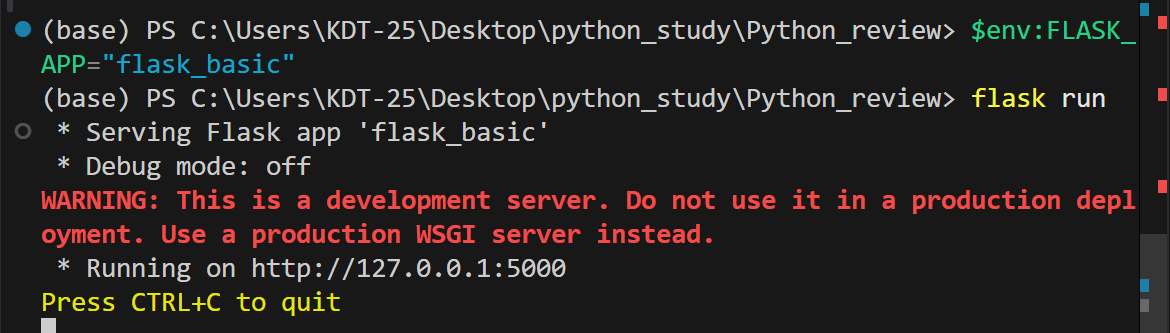
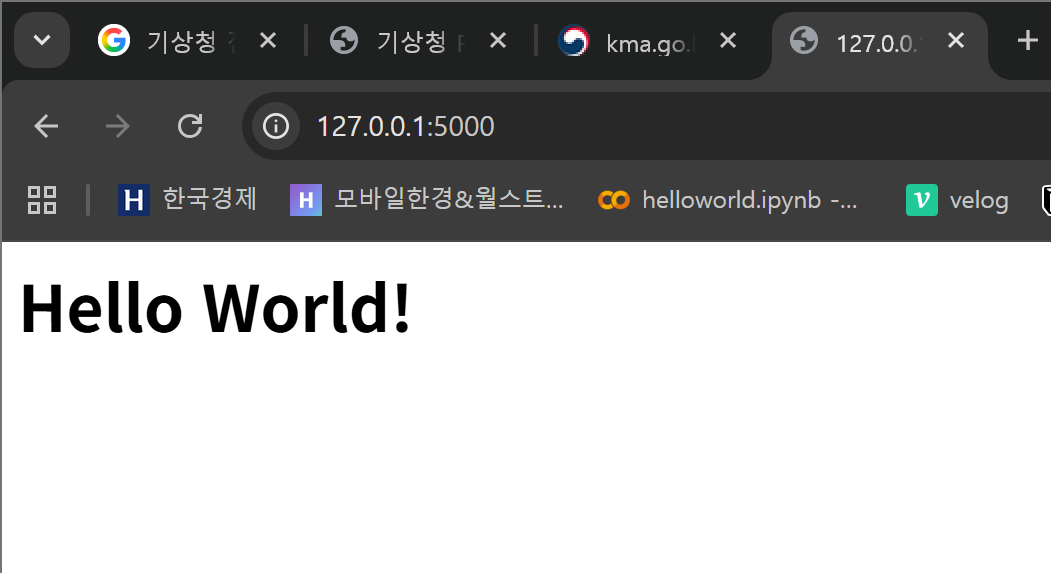

In [ ]:
#<경로>에 들어갈 때 마다 함수가 실행되므로 만들어둔 BS스크레이핑 실행하여 코드 만들 수 있음
#이전 코드를 hello()함수에 넣고 문자열 리턴하도록 변경한 형태

#손코딩_Beautiful Soup 스크레이핑 실행하기

#모듈읽어들이기
from flask import Flask
from urllib import request
from bs4 import BeautifulSoup

#웹 서버 생성
app = Flask(__name__)
@app.route("/")

def hello():
    #urlopen()함수로 기상청의 전국 날씨 읽기
    target = request.urlopen("https://www.kma.go.kr/repositary/xml/fct/mon/img/fct_mon1rss_108_20251127.xml")

    #beutifulSoup사용하여 웹페이지 분석
    soup = BeautifulSoup(target, "html.parer")

    # location 태그 찾기
    output = ""
    for location in soup.select("location"):
        #내부의 city, wf, tmn, tmx 태그를 찾아 출력
        output +="<h3>{}</h3>".format(location.select_one("city").string)
        output +-"날씨: {}<br/>".format(location.select_one("wf").string)
        output +="최저/최고 기온: {}/{}"\
            .format(\
                location.select_one("tmn").string,\
                location.select_one("tmx").string\
            )
        output += "<hr/>"
    return output


#rss가 제공되지 않아 출력은 되지 않긴 함... 다른 걸로 다시 해봐야 겠다

###라이브러리와 프레임 워크
- 라이브러리 : 정상적인 제어를 하는 모듈
- 프레임워크 : 제어 역전이 발생하는 모듈<br>
-> 제어역전(IoC:incersion of control)여부에 따라 달라짐

In [18]:
#라이브러리 = 정상적인 제어

#모듈읽어들임
from math import sin, cos, tan, floor, ceil

#sin, cos, tan
print("sin(1):", sin(1))
print("cos(1):", cos(1))
print("tan(1):", tan(1))

#내림, 올림
print("floor(2.5):", floor(2.5))
print("ceil(2.5):",ceil(2.5))

sin(1): 0.8414709848078965
cos(1): 0.5403023058681398
tan(1): 1.5574077246549023
floor(2.5): 2
ceil(2.5): 3


![스크린샷 2025-11-29 161826.png](<attachment:스크린샷 2025-11-29 161826.png>)

- flask 모듈 내부에서 출력
- 직접 실행하지 않았는데 flask모듈이 제공하는 명령어를 실행하면 flask 내부적으로 서버를 실행한 뒤 지정한 파일을 읽어들여 적절한 상황에 스스로 실행함
- 모듈이 개발자가 작성한 코드를 실행하는 형태의 모듈 : 프레임 워크


- 개발자가 모듈 함수를 호출하는 것이 일반적인 제어의 흐름
- 반대로 개발자가 만든 함수를 모듈이 실행하는 것 : 제어역전
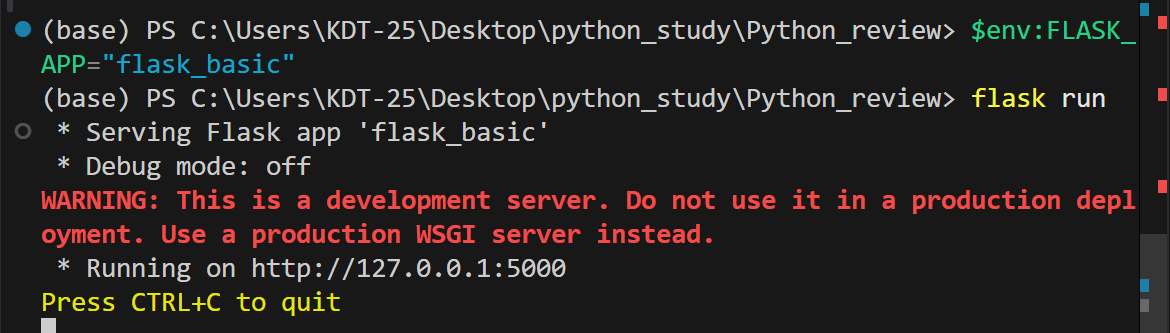

### 함수 데코레이터<br>
    cf. @app.route()
    - 함수 데코레이터
    - 클래스 데코레이터

함수데코레이터의 기본<br>
: 대상 함수의 앞뒤에 꾸밀 부가적인 내용, 혹은 반복할 내용을 데코레이터로 정의해서 손쉽게 사용할 수 있도록

*데코레이터를 사용하면 functools모듈 사용할 수 있음<br>
함수 데코레이터를 사용할 때 매개변수 등을 전달<br>
    -> 반복되는 구문이 많아 질 떄 소수의 가독성을 높이고 유용하게 사용 가능

In [ ]:
#손코딩_함수 데코레이터의 기본

#함수 데코레이터 생성
def test(function):
    def wrapper():
        print("인사가 시작되었습니다.")
        function()
        print("인사가 종료되었습니다.")
    return wrapper
#데코레이터 붙여 함수생성
@test
def hello():
    print("hello")
    
#함수호출
hello()


#@test라고 쓰면 아까 내가 정의한 test() 함수의 기능을 hello()에 씌운다

인사가 시작되었습니다.
hello
인사가 종료되었습니다.


In [ ]:
#확인문제 1 _ 소수(prime number)구하는 모듈 실행해보기
!pip install primesieve

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for primesieve
Failed to build primesieve


  DEPRECATION: Building 'primesieve' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'primesieve'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      C:\Users\KDT-25\AppData\Local\Temp\pip-install-2pewvohh\primesieve_fce2884ede6b4a3cb7179632ca220c3c\setup.py:168: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended t

In [4]:
%pip install sympy

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)

   ---------------------------------------- 0/2 [mpmath]
   ---------------------------------------- 0/2 [mpmath]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ------------------- 1/2 [sympy]
   -------------------- ----------------

In [5]:
from sympy import isprime

print(isprime(561))   # False
print(isprime(7))     # True


False
True


In [6]:
from sympy import primerange
print(list(primerange(1, 100)))   # 1~100 사이의 소수

from sympy import prime
print(prime(10))   # 10번째 소수 → 29

from sympy import nextprime
print(nextprime(100))   # 101


[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
29
101
